In [1]:
import sys
sys.path.append('../libs')

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import json
import os
import random
import glob
from detectron_pro import detectron_mask_img, detectron_mask_img_composite, detectron_multi_mask_img,detectron_person_mask_img
import shutil
import cv2
from tqdm import tqdm

import random

# Read path

In [2]:
street_dir = '/home/guest/pedestrian_generator_data/leftImg8bit'

# Image save dir
save_dir = '/home/guest/pedestrian_generator_data/leftImg8bit_result'

num_imgs = 'all'
#num_imgs = 20000

In [3]:
# Check dir folder exit
# If not, create one
if os.path.exists(save_dir) == False:
    os.makedirs(save_dir)

for s in ['leftImg8bit_no', 'leftImg8bit_person']:
    if os.path.exists(os.path.join(save_dir, s)) == False:
        os.makedirs(os.path.join(save_dir, s))

In [4]:
street_dir_ = glob.glob(street_dir+'/**/**/**/*.png', recursive=True)

random.shuffle(street_dir_)

if num_imgs in 'all':
    random.shuffle(street_dir_)
else:
    random.shuffle(street_dir_)
    people_imgs = random.sample(people_imgs, num_imgs)

In [5]:
len(street_dir_)

30000

In [6]:
street_dir_[:10]

['/home/guest/pedestrian_generator_data/leftImg8bit/val/frankfurt/frankfurt_000000_002196_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/train/ulm/ulm_000080_000019_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/train/strasbourg/strasbourg_000001_015605_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/train/jena/jena_000033_000019_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/val/munster/munster_000134_000019_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/test/berlin/berlin_000492_000019_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/test/bielefeld/bielefeld_000000_005068_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/train/hamburg/hamburg_000000_056508_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/val/lindau/lindau_000033_000019_leftImg8bit.png',
 '/home/guest/pedestrian_generator_data/leftImg8bit/test/m

In [7]:
for i,_ in tqdm(enumerate(range(len(street_dir_)))):
    try:
        mask_img,_,have_person = detectron_person_mask_img(street_dir_[i],(480,240))
        
        if have_person:
            shutil.copyfile(street_dir_[i], save_dir+'/leftImg8bit_person/'+str('{0:06}'.format(i))+'.png')
        else:
            shutil.copyfile(street_dir_[i], save_dir+'/leftImg8bit_no/'+str('{0:06}'.format(i))+'.png')
    except Exception as e:
        print("Skip image :",i)
        pass
    
    #mask_img.save(save_dir+'/mask/'+str('{0:06}'.format(i))+'.jpg')
    
    

30000it [51:53,  9.63it/s]


In [8]:
mask_img,_,have_person = detectron_person_mask_img(street_dir+"/test/bielefeld/bielefeld_000000_005741_leftImg8bit.png",(480,240))

In [9]:
have_person

False

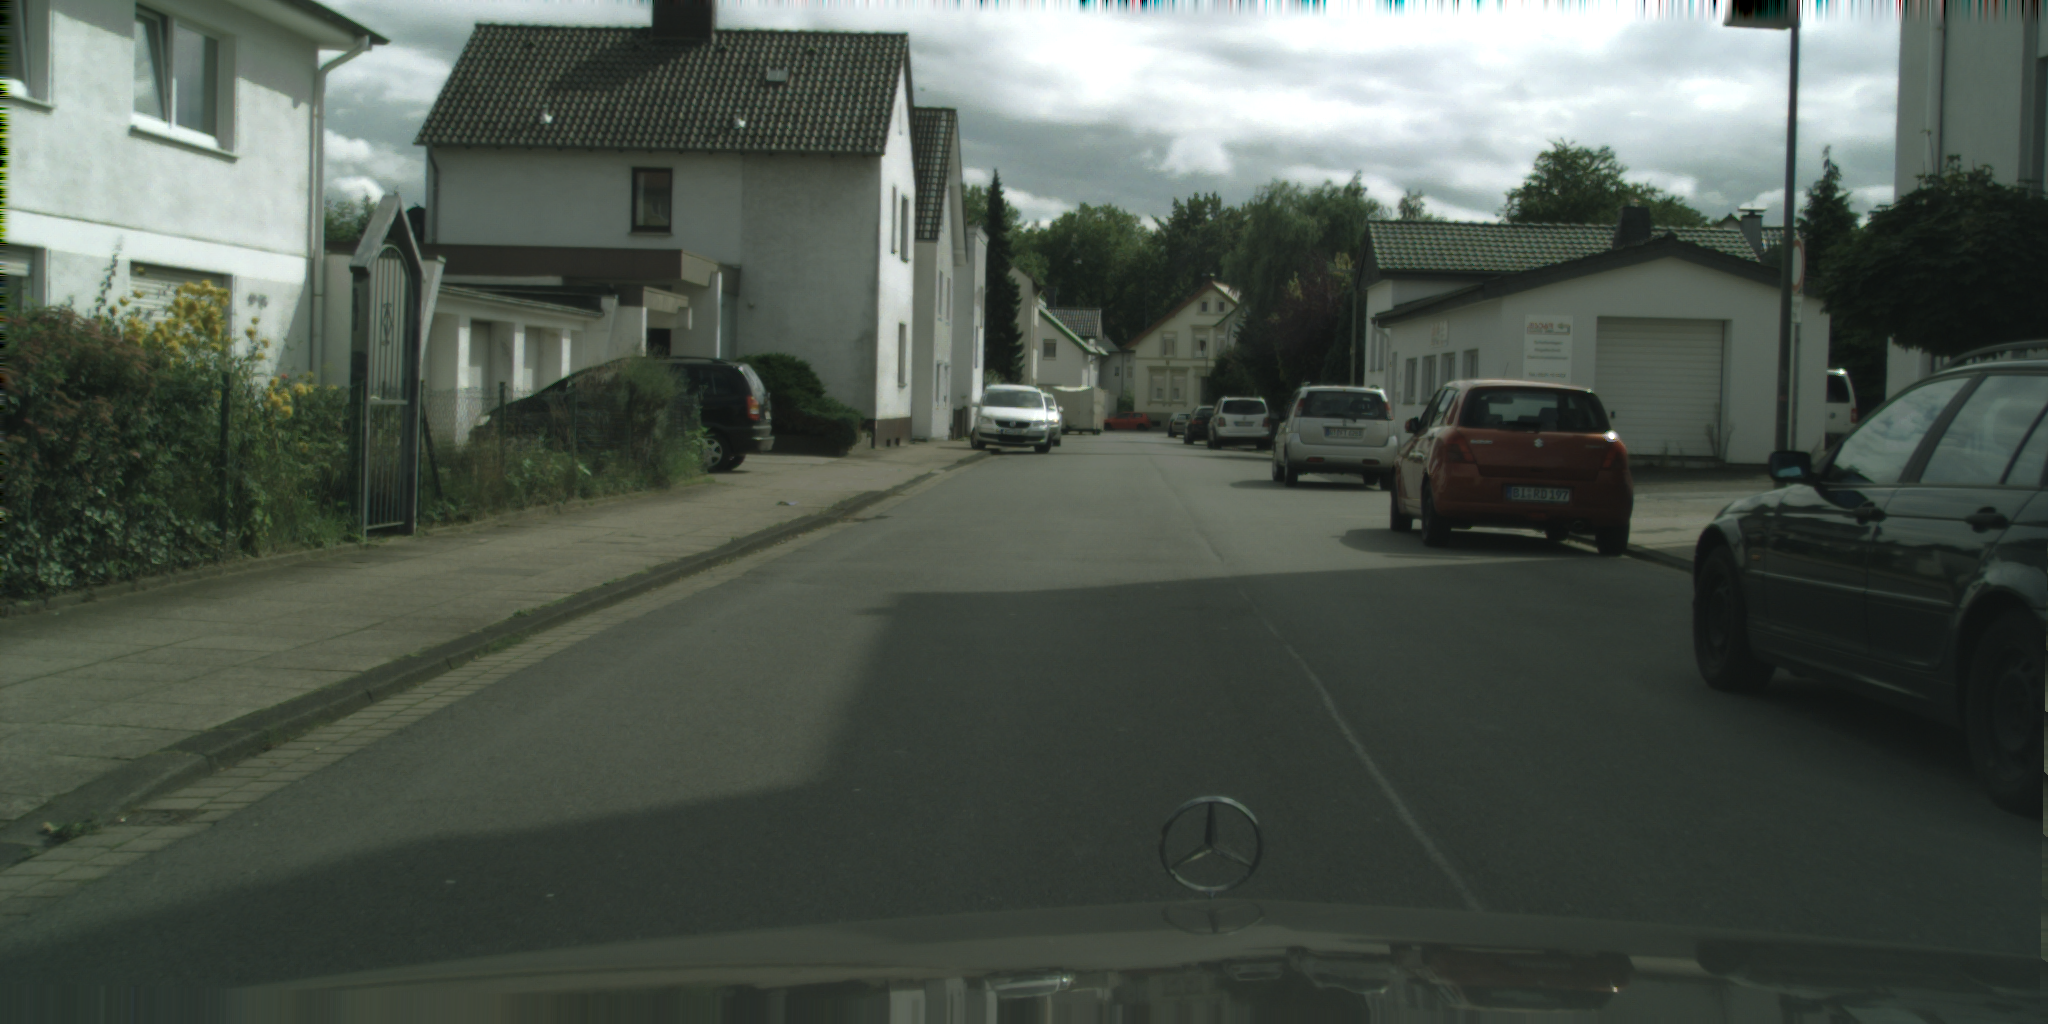

In [10]:
Image.open(street_dir+"/test/bielefeld/bielefeld_000000_005741_leftImg8bit.png")

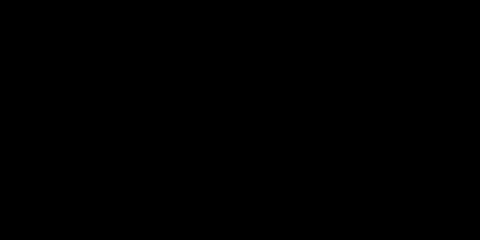

In [11]:
Image.fromarray(mask_img)

In [12]:
# Image.fromarray(ou['instances'].pred_masks.cpu().numpy()[0])

In [13]:
# ou